In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [ ]:
df.isnull().values.any()

False

In [ ]:
df['Kyphosis'].replace(['present', 'absent'],
                        [0, 1], inplace=True)

In [ ]:
df

,Kyphosis,Age,Number,Start
0,1,71,3,5
1,1,158,3,14
2,0,128,4,5
3,1,2,5,1
4,1,1,4,15
...,...,...,...,...
76,0,157,3,13
77,1,26,7,13
78,1,120,2,13
79,0,42,7,6


In [ ]:
df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.790123,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,1.000000,26.000000,3.000000,9.000000
50%,1.000000,87.000000,4.000000,13.000000
75%,1.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [ ]:
x = df.drop(['Kyphosis'], axis = 1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [ ]:
y = df['Kyphosis']

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.35,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
predictions = dtc.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.80      0.91      0.85        22

    accuracy                           0.76        29
   macro avg       0.65      0.60      0.61        29
weighted avg       0.73      0.76      0.73        29



In [ ]:
print(confusion_matrix(ytest,predictions))

[[ 2  5]
 [ 2 20]]


In [ ]:
dtc.score(xtest,ytest)

0.7586206896551724

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

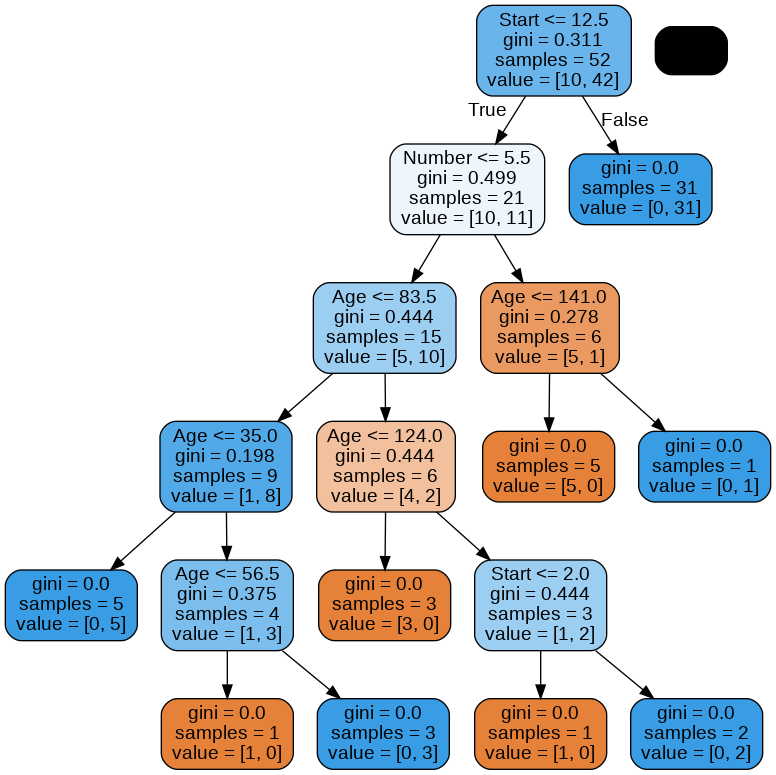

In [ ]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 